# MNIST Classifier

## Get Datasets

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
# print shape of the data
X, y = mnist['data'], mnist['target']

print("X shape = ", X.shape)
print("y shape = ", y.shape)

X shape =  (70000, 784)
y shape =  (70000,)


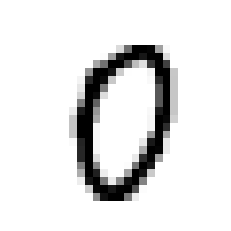

Answer =  0


In [2]:
# Show examples of datasets
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

sample = X[1000]
sample = sample.reshape(28, 28) # 28 * 28 = 784

# Plot Data
plt.imshow(sample, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

# Print Answer
print("Answer = ", y[1000])

## Test Set Separation

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np

# Shuffle Training Set for Accuracy
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Naive Multinomial Classifier

In [5]:
# using KNeiborsClassifier (Recommended)
from sklearn.neighbors import KNeighborsClassifier

print("Train Data...")
knc_model = KNeighborsClassifier(n_neighbors=10)
knc_model.fit(X_train, y_train)
print("Train Process Done.")

Train Data...
Train Process Done.


In [ ]:
# Validation score
from sklearn.model_selection import cross_val_score

cross_val_score(knc_model, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
# Test set score
from sklearn.metrics import accuracy_score

y_test_pred = knc_model.predict(X_test)
accuracy_score(y_test, y_test_pred)